In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [11]:
# !pip3 install google-cloud-datastore
# !pip3 install kaggle
# !ls -la

In [20]:
from google.oauth2 import service_account
from google.cloud import bigquery
# TODO(developer): Set key_path to the path to the service account key
#                  file.
key_path = "GOOGLE_API_CREDENTIALS.json"

credentials = service_account.Credentials.from_service_account_file(
    key_path,
    scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

print(credentials.project_id)

client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id,
)

geometric-orbit-260520


In [29]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

preparation_v2_DistanceToFirstStop_p20

In [26]:
DistanceToFirstStop_p20 = client.list_rows('bqml_example.preparation_v2_DistanceToFirstStop_p20')
print("Total rows: {}".format(DistanceToFirstStop_p20.total_rows))

Total rows: 857409


In [27]:
df_DistanceToFirstStop_p20 = DistanceToFirstStop_p20.to_dataframe()

In [28]:
df_DistanceToFirstStop_p20.head()

,Latitude,Longitude,direction_E_E,direction_E_N,direction_E_NE,direction_E_NW,direction_E_S,direction_E_SE,direction_E_SW,direction_E_W,...,direction_W_SW,direction_W_W,Hour,Weekend,Month,city_Boston,city_Philadelphia,city_Atlanta,city_Chicago,DistanceToFirstStop_p20
0,42.26869,-71.09375,0,0,1,0,0,0,0,0,...,0,0,12,0,11,1,0,0,0,0.0
1,42.26869,-71.09375,0,0,0,0,0,0,0,0,...,0,0,11,0,10,1,0,0,0,0.0
2,42.26869,-71.09375,0,1,0,0,0,0,0,0,...,0,0,12,0,6,1,0,0,0,23.6
3,42.26869,-71.09375,0,1,0,0,0,0,0,0,...,0,0,16,0,10,1,0,0,0,0.0
4,42.26869,-71.09375,0,0,0,0,0,0,0,0,...,0,0,13,0,7,1,0,0,0,0.0


In [38]:
X_columns = [cl for cl in df_DistanceToFirstStop_p20.columns if cl != "DistanceToFirstStop_p20"]

In [42]:
y = df_DistanceToFirstStop_p20['DistanceToFirstStop_p20'].values
X = df_DistanceToFirstStop_p20[X_columns].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [44]:
regressor = LinearRegression()  

In [45]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-2250.8736240758394
[ 2.36708716e+01 -1.66789355e+01 -6.15995457e+00  2.62746154e+00
 -6.99652055e-01  3.86685122e+00 -3.44303915e+00 -4.57924922e+00
 -4.76689131e+00  5.88706719e+00 -5.30728202e+00 -6.59694846e+00
 -4.21112189e+00 -2.35939096e-01  1.10126799e+00 -6.20623761e+00
  2.05669000e+01  3.22374522e+00 -5.68873957e+00 -3.38925994e+00
 -6.53989758e+00  1.82091958e+00  3.06072631e+00 -3.52260949e+00
  1.28749465e-01  6.84323633e+00  1.94465986e-01  6.14921003e-01
 -3.60933918e+00 -4.59734214e+00  2.41658193e+00  1.03861701e+01
  6.40501525e+00  1.53026638e+00  3.82507678e+00  1.21369326e+01
  4.16836908e+00 -1.55930190e+00 -5.83611281e+00 -3.57391101e+00
 -2.74463530e+00 -4.44990293e+00 -3.47494363e-01 -9.71221071e-02
  4.39750591e+00  6.05210422e+00 -3.33681415e-02 -3.93494513e+00
 -2.97301679e+00 -2.31822355e+00 -8.33009486e-02 -7.59439770e+00
  5.62369569e+00 -6.42752153e-01 -2.17397040e+00  6.57896893e+00
 -5.73370408e+00 -5.38668820e+00  6.64222248e+00 -5.29253515e+00
 -6.3

In [47]:
y_pred = regressor.predict(X_test)

In [51]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.loc[:30, :]

,Actual,Predicted
0,0.0,7.099481
1,0.0,8.190340
2,0.0,6.348081
3,0.0,5.574187
4,0.0,6.386076
5,0.0,3.283553
6,0.0,6.309956
7,0.0,6.737248
8,0.0,5.054356
9,0.0,4.497802


In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.542907487654945
Mean Squared Error: 788.8880601140821
Root Mean Squared Error: 28.087151156962896


In [52]:
df_DistanceToFirstStop_p20.head()

,Latitude,Longitude,direction_E_E,direction_E_N,direction_E_NE,direction_E_NW,direction_E_S,direction_E_SE,direction_E_SW,direction_E_W,...,direction_W_SW,direction_W_W,Hour,Weekend,Month,city_Boston,city_Philadelphia,city_Atlanta,city_Chicago,DistanceToFirstStop_p20
0,42.26869,-71.09375,0,0,1,0,0,0,0,0,...,0,0,12,0,11,1,0,0,0,0.0
1,42.26869,-71.09375,0,0,0,0,0,0,0,0,...,0,0,11,0,10,1,0,0,0,0.0
2,42.26869,-71.09375,0,1,0,0,0,0,0,0,...,0,0,12,0,6,1,0,0,0,23.6
3,42.26869,-71.09375,0,1,0,0,0,0,0,0,...,0,0,16,0,10,1,0,0,0,0.0
4,42.26869,-71.09375,0,0,0,0,0,0,0,0,...,0,0,13,0,7,1,0,0,0,0.0


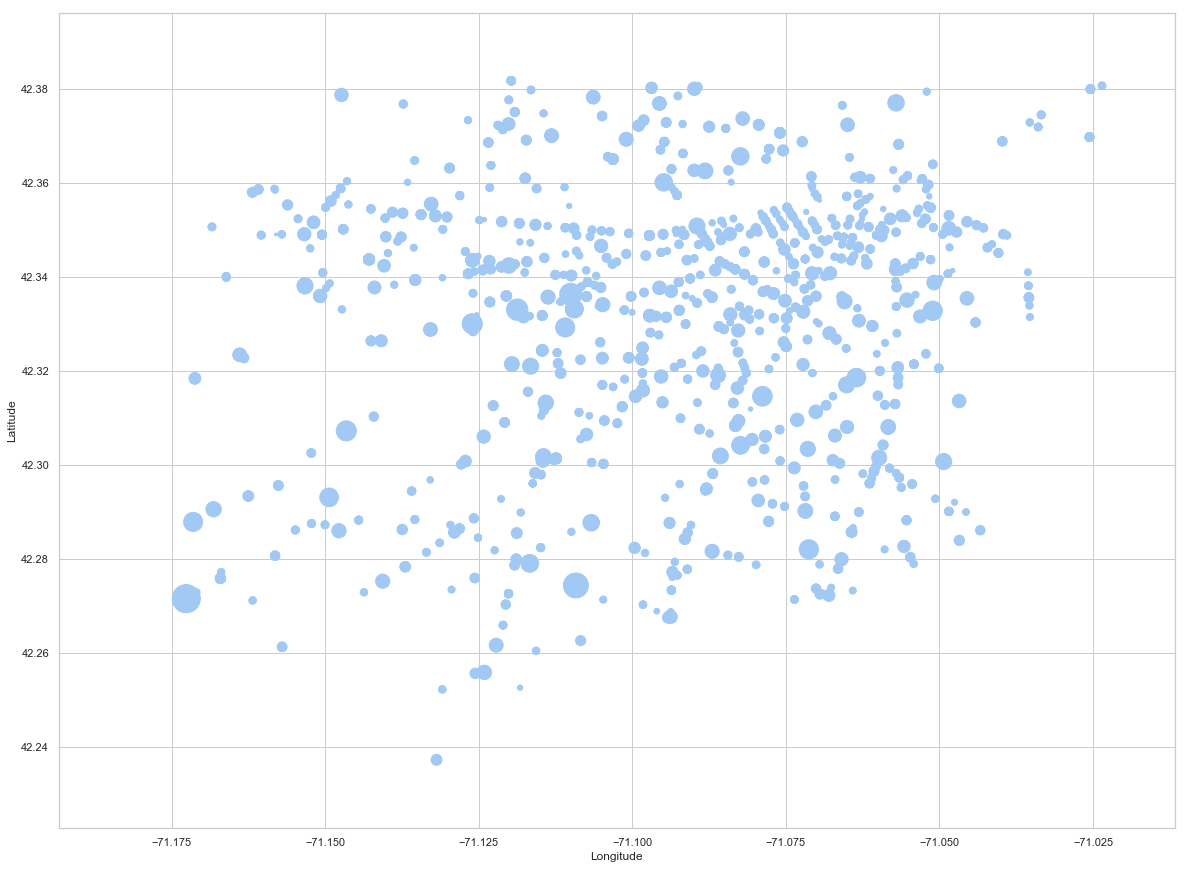

In [99]:
df_DistanceToFirstStop_p20[df_DistanceToFirstStop_p20['city_Boston']==1].plot(kind="scatter", x="Longitude", y="Latitude",
                                                                            s=df_DistanceToFirstStop_p20[df_DistanceToFirstStop_p20['city_Boston']==1]['DistanceToFirstStop_p20'], 
#                                                                               label="DistanceToFirstStop_p20",
#                                                                               c="DistanceToFirstStop_p20", 
#                                                                               cmap=plt.get_cmap("jet"),
#                                                                               colorbar=True, 
#                                                                               alpha=0.4, 
                                                                              figsize=(20,15),
#                                                                              vmin=0, vmax=20
                                                                             )
# plt.legend()
plt.show()

In [96]:
# top = df_DistanceToFirstStop_p20[df_DistanceToFirstStop_p20['city_Boston']==1].sort_values('DistanceToFirstStop_p20', ascending=False)[:100]
df_DistanceToFirstStop_p20[df_DistanceToFirstStop_p20['city_Boston']==1].sort_values('DistanceToFirstStop_p20', ascending=False)[:100]

,Latitude,Longitude,direction_E_E,direction_E_N,direction_E_NE,direction_E_NW,direction_E_S,direction_E_SE,direction_E_SW,direction_E_W,...,direction_W_SW,direction_W_W,Hour,Weekend,Month,city_Boston,city_Philadelphia,city_Atlanta,city_Chicago,DistanceToFirstStop_p20
416878,42.27153,-71.17265,0,0,0,0,0,0,0,0,...,0,0,17,0,10,1,0,0,0,781.7
416780,42.27153,-71.17265,0,0,0,0,0,0,0,0,...,0,0,17,0,9,1,0,0,0,741.2
416725,42.27153,-71.17265,0,0,0,0,0,0,0,0,...,0,0,14,1,6,1,0,0,0,737.7
416716,42.27153,-71.17265,0,0,0,0,0,0,0,0,...,0,0,16,0,12,1,0,0,0,722.2
416819,42.27153,-71.17265,0,0,0,0,0,0,0,0,...,0,0,14,0,11,1,0,0,0,718.6
416651,42.27153,-71.17265,0,0,0,0,0,0,0,0,...,0,0,15,0,8,1,0,0,0,674.1
416823,42.27153,-71.17265,0,0,0,0,0,0,0,0,...,0,0,11,0,6,1,0,0,0,670.0
101291,42.27434,-71.10919,0,0,0,0,0,0,0,0,...,0,0,14,1,11,1,0,0,0,622.1
22477,42.33631,-71.11003,0,0,0,0,0,0,0,0,...,0,0,7,0,10,1,0,0,0,487.9
256602,42.33305,-71.11874,0,0,0,0,0,0,0,0,...,0,0,14,1,12,1,0,0,0,456.3


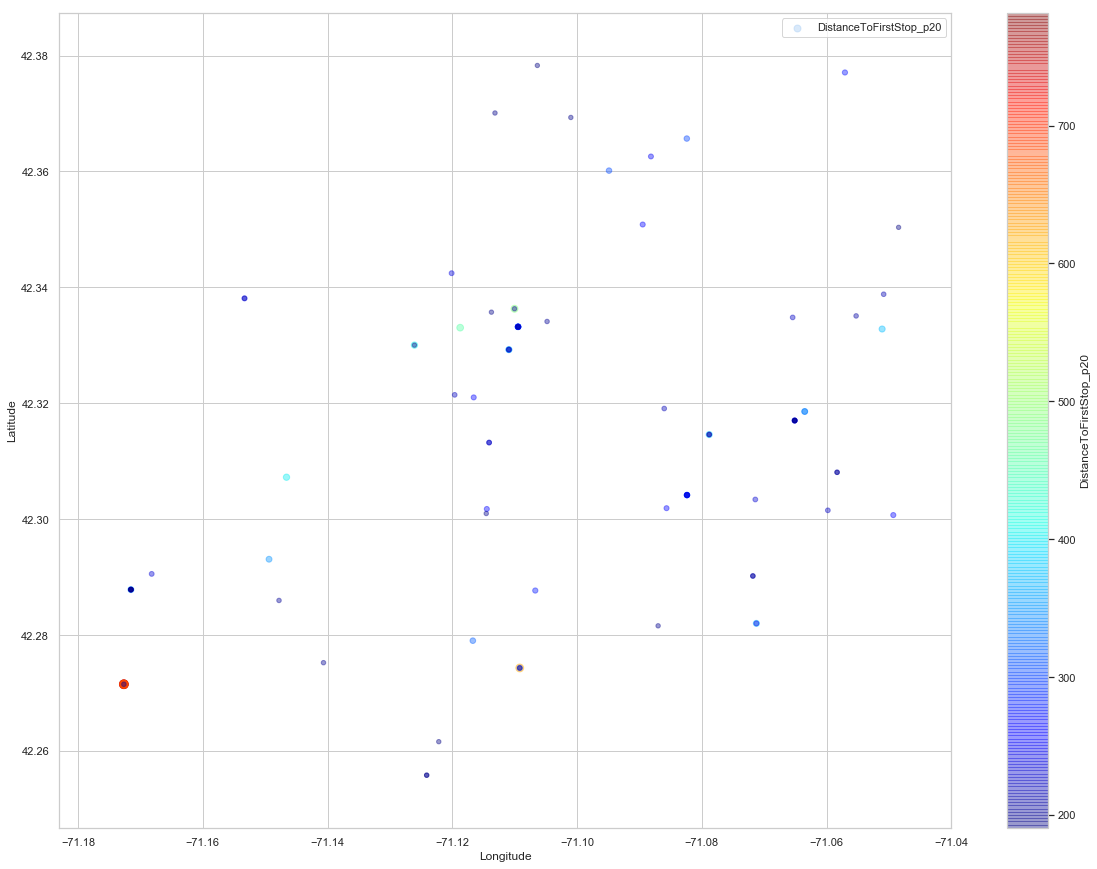

In [83]:
top.plot(kind="scatter", x="Longitude", y="Latitude",
                                                                            s=top['DistanceToFirstStop_p20']/10, 
                                                                              label="DistanceToFirstStop_p20",
                                                                              c="DistanceToFirstStop_p20", 
                                                                              cmap=plt.get_cmap("jet"),
                                                                              colorbar=True, alpha=0.4, figsize=(20,15),
#                                                                              vmin=0, vmax=20
                                                                             )
plt.legend()
plt.show()

In [84]:
top

,Latitude,Longitude,direction_E_E,direction_E_N,direction_E_NE,direction_E_NW,direction_E_S,direction_E_SE,direction_E_SW,direction_E_W,...,direction_W_SW,direction_W_W,Hour,Weekend,Month,city_Boston,city_Philadelphia,city_Atlanta,city_Chicago,DistanceToFirstStop_p20
416878,42.27153,-71.17265,0,0,0,0,0,0,0,0,...,0,0,17,0,10,1,0,0,0,781.7
416780,42.27153,-71.17265,0,0,0,0,0,0,0,0,...,0,0,17,0,9,1,0,0,0,741.2
416725,42.27153,-71.17265,0,0,0,0,0,0,0,0,...,0,0,14,1,6,1,0,0,0,737.7
416716,42.27153,-71.17265,0,0,0,0,0,0,0,0,...,0,0,16,0,12,1,0,0,0,722.2
416819,42.27153,-71.17265,0,0,0,0,0,0,0,0,...,0,0,14,0,11,1,0,0,0,718.6
416651,42.27153,-71.17265,0,0,0,0,0,0,0,0,...,0,0,15,0,8,1,0,0,0,674.1
416823,42.27153,-71.17265,0,0,0,0,0,0,0,0,...,0,0,11,0,6,1,0,0,0,670.0
101291,42.27434,-71.10919,0,0,0,0,0,0,0,0,...,0,0,14,1,11,1,0,0,0,622.1
22477,42.33631,-71.11003,0,0,0,0,0,0,0,0,...,0,0,7,0,10,1,0,0,0,487.9
256602,42.33305,-71.11874,0,0,0,0,0,0,0,0,...,0,0,14,1,12,1,0,0,0,456.3
